# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Group Project: Due Friday 26 May 2023 (11:59pm) </center>
### <center> An investigation of classification methods for UCI ML diabetes </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, load_breast_cancer, load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

seed = 1234
np.random.seed(seed)  

from sklearn.preprocessing import LabelEncoder

import itertools

In [12]:
# prepare input data
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

In [13]:
X = pd.read_csv('diabetic_data.csv')
y = X['readmitted']
X.drop(['readmitted'], axis = 1, inplace = True)

Summary a short 2-4 sentence summary of your project, identifying the dataset(s) you used, what classification methods you investigated, and 1 or 2 main conclusions from your investigations

### Experimental Setup:
describe briefly how you conducted your experimental methodology. What metrics did you look at? e..g, just classification accuracy (or error), or other metrics (such as precision/recall for binary classifiers). How did you partition up your data? we recommend that at the start of your project you set aside a test dataset that is only used once at the end of your project for final evaluation of models (this will be a realistic test of your method), e.g., 20% randomly selected examples, or the specified test set if the dataset has such.  The rest of the data (e.g., the remaining 80%) can be partitioned into a training and validation set (e.g., 75% of the 80% (i.e., 60% of the total) for training and 25% of the 80% (i.e, 20% of the total) for validation, where the validation set can be used for hyperparameter tuning. Be clear on how you selected hyparameters: feel free to use pseudocode for example to describe precisely what you did. In reporting machine learning experiments it is important that your experiments are reproducible (for others to independently validate and recreate what you did), and reproducibility implies clear documentation.

In [35]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=seed)

X_train_enc, X_test_enc = prepare_inputs(X_tr, X_te)

In [17]:
X_tr.shape

(71236, 49)

In [18]:
X_te.shape

(30530, 49)

In [85]:
X_train_enc.shape

(71236, 127925)

In [78]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_enc, y_tr)

y_tr_pred = dt_classifier.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = dt_classifier.predict(X_test_enc)
testing_error = 1 - accuracy_score(y_te, y_te_pred)

feature_used = dt_classifier.tree_.feature[0]
threshold_used = dt_classifier.tree_.threshold[0]

print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")
print(f"Feature used in the first split: {feature_used}")
print(f"Threshold used in the first split: {threshold_used}")

Training Set Error: 0.0000
Testing Set Error: 0.4877
Feature used in the first split: 125689
Threshold used in the first split: 0.5


In [ ]:
ensemble_model = GradientBoostingClassifier()
ensemble_model.fit(X_train_enc, y_tr)

y_tr_pred = ensemble_model.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = ensemble_model.predict(X_test_enc)
testing_error = 1 - accuracy_score(y_te, y_te_pred)

In [80]:
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

Training Set Error: 0.4065
Testing Set Error: 0.4104


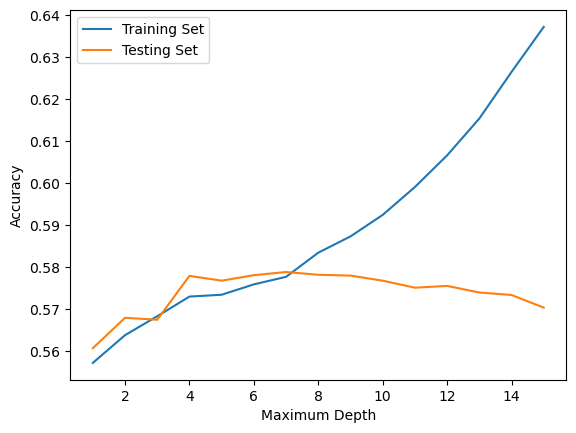

In [81]:
# Define the depths to consider
depths = range(1, 16)

# Initialize empty lists to store accuracies
train_accuracies = []
test_accuracies = []

# Train decision trees with varying depths and calculate accuracies
for depth in depths:
    # Train a decision tree classifier on the training data
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train_enc, y_tr)
    
    # Calculate training set accuracy
    y_tr_pred = dt_classifier.predict(X_train_enc)
    train_accuracy = accuracy_score(y_tr, y_tr_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate testing set accuracy
    y_te_pred = dt_classifier.predict(X_test_enc)
    test_accuracy = accuracy_score(y_te, y_te_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracies as a function of depth
plt.plot(depths, train_accuracies, label='Training Set')
plt.plot(depths, test_accuracies, label='Testing Set')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

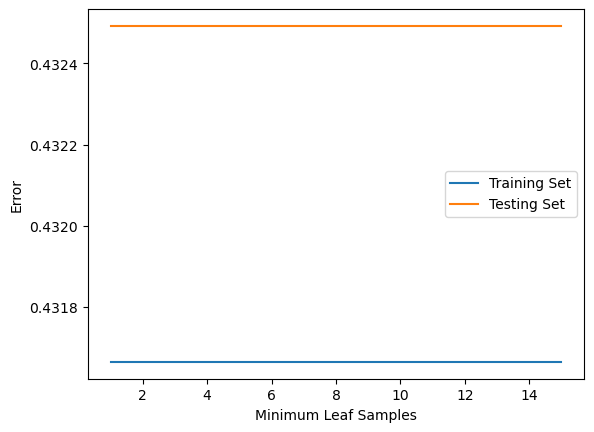

In [36]:
# Define the minimum leaf samples to consider
min_samples_leaf_values = range(1, 16)

# Initialize empty lists to store accuracies
train_errors = []
test_errors = []

# Train decision trees with varying minimum leaf samples and calculate accuracies
for min_samples_leaf in min_samples_leaf_values:
    # Train a decision tree classifier on the training data
    dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=min_samples_leaf)
    dt_classifier.fit(X_train_enc, y_tr)
    
    # Calculate training set accuracy
    y_tr_pred = dt_classifier.predict(X_train_enc)
    train_error = 1 - accuracy_score(y_tr, y_tr_pred)
    train_errors.append(train_error)
    
    # Calculate testing set accuracy
    y_te_pred = dt_classifier.predict(X_test_enc)
    test_error = 1 - accuracy_score(y_te, y_te_pred)
    test_errors.append(test_error)

# Plot the accuracies as a function of minimum leaf samples
plt.plot(min_samples_leaf_values, train_errors, label='Training Set')
plt.plot(min_samples_leaf_values, test_errors, label='Testing Set')
plt.xlabel('Minimum Leaf Samples')
plt.ylabel('Error')
plt.legend()
plt.show()

It seems to be inefficient to utilize decision tree method with a dataset with multiple categorical values. There are few reasons for it. The size of the dataset will span by a margin since we need to create new columns with binary data for each category of each features, using onehotencoder or similar functions such as get_dummies. There are some problems caused by this. Varying features will mess up feature importances. Since there are only few true values for each feature vectores. Also, computation will become exteremely expensive with this method.

We couldn't asymtonically approach 60% accuracy on testing set with trained models. It seems that manipulating arbitrary variables of decision tree couldn't help with the issues. 

### 2.
By reviewing the data, we could observe that there are numerous missing values.
Approaching with columns that have sufficient numbers of data might increase accuracy of decision tree, hence we tried the same machine learning with smaller subsets of columns.

In [6]:
def sub_lists(my_list):
    subs = []
    for i in range(0, len(my_list)+1):
        temp = [list(x) for x in itertools.combinations(my_list, i)]
        if len(temp)>0:
            subs.extend(temp)
    return subs

In [15]:
k = 2
tr_err_list, te_err_list, feature_list = [],[], []
numb_features = []

dt_classifier = DecisionTreeClassifier()



#Looping over all possible combinations: from 11 choose k
for combo in itertools.combinations(X.columns,k):
    X_comb = X[list(combo)]
    X_tr, X_te, y_tr, y_te = train_test_split(X_comb, y, test_size=0.3, random_state=seed)

    X_train_enc, X_test_enc = prepare_inputs(X_tr, X_te)
    
    dt_classifier.fit(X_train_enc, y_tr)   #Store temp result 
    
    y_tr_pred = dt_classifier.predict(X_train_enc)
    training_error = 1 - accuracy_score(y_tr, y_tr_pred)

    y_te_pred = dt_classifier.predict(X_test_enc)
    testing_error = 1 - accuracy_score(y_te, y_te_pred)
    
    te_err_list.append(training_error)                  #Append lists
    tr_err_list.append(testing_error)
    feature_list.append(combo)
    numb_features.append(len(combo))   
    
#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'test_error': te_err_list, 'train_error':tr_err_list,'features':feature_list})

In [37]:
df.sort_values(by='testing_error', ascending=True)[:20]

,numb_features,train_error,features,testing_error
81,2,0.140308,"(patient_nbr, acarbose)",0.406715
51,2,0.140196,"(patient_nbr, weight)",0.406780
49,2,0.140617,"(patient_nbr, gender)",0.406911
72,2,0.139943,"(patient_nbr, nateglinide)",0.406911
86,2,0.140617,"(patient_nbr, citoglipton)",0.406944
90,2,0.140617,"(patient_nbr, glimepiride-pioglitazone)",0.406944
89,2,0.140617,"(patient_nbr, glipizide-metformin)",0.406944
91,2,0.140617,"(patient_nbr, metformin-rosiglitazone)",0.406944
75,2,0.140617,"(patient_nbr, acetohexamide)",0.406944
92,2,0.140617,"(patient_nbr, metformin-pioglitazone)",0.406944


In [39]:
df.sort_values(by='testing_error', ascending=True).to_csv("df_subsets_results.csv")

Not such improvement could be found with this experimental setup.

### 3.
This experiment will use different training datasets, which is filtered from the original one with human insights. We could observe numerous missing values from multiple columns, and those could be creating bias in our training result. Also, object data that could be converted to numerical values with human insights are manually converted. Furthermore, to minimize the bias, we used labelencoder to convert remaining categorical data, instead of using onehotencoder.

In [8]:
X = pd.read_csv('diabetic_data.csv')
y = X['readmitted']
X.drop(['readmitted'], axis = 1, inplace = True)

# get drop list with columns consisted with 80% or more of same values. Mostly null values.
drop_list = []
for col in X.columns:
    X[col].replace('?', None, inplace = True)
    X[col].replace('No', 0, inplace = True)
    X[col].replace('None', 0, inplace = True)
    
    val_counts = X[col].value_counts()
    if val_counts.iloc[0] / val_counts.sum() > 0.8:
        drop_list.append(col)

for elem in drop_list:
    X.drop([elem], axis = 1, inplace = True)

#prepare y with int values
y.replace('>30', 2, inplace = True)
y.replace('<30', 1, inplace = True)
y.replace('NO', 0, inplace = True)

#prepare age column by converting object to int values
for val in list(set(X['age'].values)):
    X['age'].replace(val, val[-3:-1], inplace = True)

X['age'].replace('00', 100, inplace = True)

for val in list(set(X['age'].values)):
    X['age'].replace(val, int(val), inplace = True)

#prepare insulin column converting objects to int
X['insulin'].replace('Down', -1, inplace = True)
X['insulin'].replace('No', 0, inplace = True)
X['insulin'].replace('Steady', 1, inplace = True)
X['insulin'].replace('Up', 2, inplace = True)

#prepare change column converting objects to int
X['change'].replace('Ch', 1, inplace = True)
X['change'].replace('No', 0, inplace = True)

#prepare diabetesMed column
X['diabetesMed'].replace('No', 0, inplace = True)
X['diabetesMed'].replace('Yes', 1, inplace = True)

In [9]:
count = 0
for val in list(set(X['diag_1'].values)):
    if val != None and val[0].isalpha():
        count += 1
    elif val ==None:
        pass
    else:
        X['diag_1'].replace(val, float(val), inplace = True)
        
count / len(X['diag_1'])

0.00018670282805652183

In [2]:
for val in list(set(X['diag_1'].values)):
    if val != None and val[0].isalpha():
        X['diag_1'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_1'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_2'].values)):
    if val != None and val[0].isalpha():
        X['diag_2'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_2'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_3'].values)):
    if val != None and val[0].isalpha():
        X['diag_3'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_3'].replace(val, float(val), inplace = True)

X.fillna(X.mean(), inplace=True)

#labelEncoder method
le = LabelEncoder()
for col in X.columns:
    if X.dtypes[col] == object:
        X[col] = le.fit_transform(X[col])
        
# X = X.apply(LabelEncoder().fit_transform)

In [3]:
X.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int64
gender                        int64
age                           int64
weight                        int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                    int64
medical_specialty             int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
insulin                       int64
change                        int64
diabetesMed                   int64
dtype: object

In [5]:
X.shape

(101766, 23)

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=seed)

X_train_enc, X_test_enc = X_tr, X_te

In [7]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_enc, y_tr)

y_tr_pred = dt_classifier.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = dt_classifier.predict(X_test_enc)
testing_error = 1 - accuracy_score(y_te, y_te_pred)

feature_used = dt_classifier.tree_.feature[0]
threshold_used = dt_classifier.tree_.threshold[0]

print("Decision Tree classifier with manually filtered dataset")
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")
print(f"Feature used in the first split: {feature_used}")
print(f"Threshold used in the first split: {threshold_used}")

Decision Tree classifier with manually filtered dataset
Training Set Error: 0.0000
Testing Set Error: 0.5163
Feature used in the first split: 15
Threshold used in the first split: 0.5


In [8]:
ensemble_model = GradientBoostingClassifier()
ensemble_model.fit(X_train_enc, y_tr)

y_tr_pred = ensemble_model.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = ensemble_model.predict(X_test_enc)
testing_error = 1 - accuracy_score(y_te, y_te_pred)
print("Gradient Boost Classifier with manually filtered dataset ")
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

Gradient Boost Classifier with manually filtered dataset 
Training Set Error: 0.3885
Testing Set Error: 0.3975


In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train_enc, y_tr)

y_tr_pred = rf_clf.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = rf_clf.predict(X_test_enc)
print("Random Forest Classifier with manually filtered dataset ")
testing_error = 1 - accuracy_score(y_te, y_te_pred)
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

Random Forest Classifier with manually filtered dataset 
Training Set Error: 0.4604
Testing Set Error: 0.4620


Gradient Boosting Classifier provided the best result so far. We will now fine tune the Gradient Boosting Classifier with different parameters.

### 3. 2
Continueing with the same dataset, we will fine tune Gradient Boosting Classifier with different parameters.

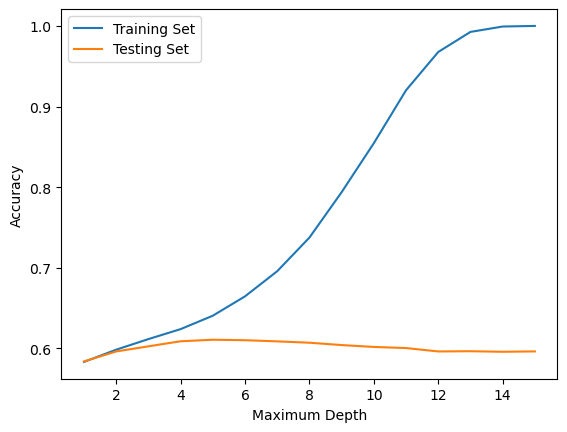

In [8]:
# Define the depths to consider
depths = range(1, 16)

# Initialize empty lists to store accuracies
train_accuracies = []
test_accuracies = []

# Train decision trees with varying depths and calculate accuracies
for depth in depths:
    # Train a decision tree classifier on the training data
    ensemble_model = GradientBoostingClassifier(max_depth=depth)
    ensemble_model.fit(X_train_enc, y_tr)
    
    # Calculate training set accuracy
    y_tr_pred = ensemble_model.predict(X_train_enc)
    train_accuracy = accuracy_score(y_tr, y_tr_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate testing set accuracy
    y_te_pred = ensemble_model.predict(X_test_enc)
    test_accuracy = accuracy_score(y_te, y_te_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracies as a function of depth
plt.plot(depths, train_accuracies, label='Training Set')
plt.plot(depths, test_accuracies, label='Testing Set')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

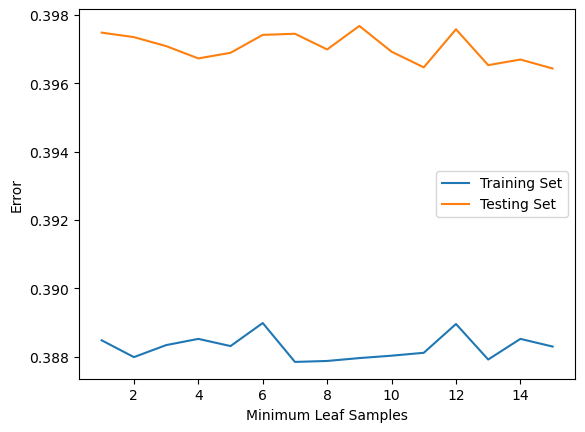

In [9]:
# Define the minimum leaf samples to consider
min_samples_leaf_values = range(1, 16)

# Initialize empty lists to store accuracies
train_errors = []
test_errors = []

# Train decision trees with varying minimum leaf samples and calculate accuracies
for min_samples_leaf in min_samples_leaf_values:
    # Train a decision tree classifier on the training data
    dt_classifier = GradientBoostingClassifier(max_depth=3, min_samples_leaf=min_samples_leaf)
    dt_classifier.fit(X_train_enc, y_tr)
    
    # Calculate training set accuracy
    y_tr_pred = dt_classifier.predict(X_train_enc)
    train_error = 1 - accuracy_score(y_tr, y_tr_pred)
    train_errors.append(train_error)
    
    # Calculate testing set accuracy
    y_te_pred = dt_classifier.predict(X_test_enc)
    test_error = 1 - accuracy_score(y_te, y_te_pred)
    test_errors.append(test_error)

# Plot the accuracies as a function of minimum leaf samples
plt.plot(min_samples_leaf_values, train_errors, label='Training Set')
plt.plot(min_samples_leaf_values, test_errors, label='Testing Set')
plt.xlabel('Minimum Leaf Samples')
plt.ylabel('Error')
plt.legend()
plt.show()

We could observe the depth = 3 resulted the lowest error rate, and have linear relation with the error rate, while the minimum leaf samples don't seem to have linear relation to it.

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=seed)

X_train_enc, X_test_enc = X_tr, X_te

In [7]:
ensemble_model = GradientBoostingClassifier(max_depth=4)
ensemble_model.fit(X_train_enc, y_tr)

y_tr_pred = ensemble_model.predict(X_train_enc)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = ensemble_model.predict(X_test_enc)
testing_error = 1 - accuracy_score(y_te, y_te_pred)
print("Gradient Boost Classifier with manually filtered dataset ")
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

Gradient Boost Classifier with manually filtered dataset 
Training Set Error: 0.3759
Testing Set Error: 0.3919
